In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('SuperstoreabcCopy.xlsx')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
sdf = df.loc[: , ['Order Date' , 'Sales']]

In [5]:
sdf.head()

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
2,2016-06-12,14.6200
3,2015-10-11,957.5775
4,2015-10-11,22.3680


In [6]:
sdf.columns

Index(['Order Date', 'Sales'], dtype='object')

In [4]:
sdf = sdf.groupby('Order Date')['Sales'].mean()

In [5]:
sdf = pd.DataFrame(data = sdf)

In [8]:
sdf

,Sales
Order Date,
2014-01-03,16.448000
2014-01-04,96.020000
2014-01-05,19.536000
2014-01-06,489.677778
2014-01-07,43.579000
...,...
2017-12-26,203.648500
2017-12-27,88.818000
2017-12-28,87.228989


In [141]:
#sdf = sdf.groupby('Order Date')['Sales'].mean().reset_index()

In [18]:
sdf.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-05', '2014-01-06',
               '2014-01-07', '2014-01-09', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14',
               ...
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1237, freq=None)

In [19]:
sdf.isnull().sum()

Sales    0
dtype: int64

In [20]:
sdf.dtypes

Sales    float64
dtype: object

<Axes: xlabel='Order Date'>

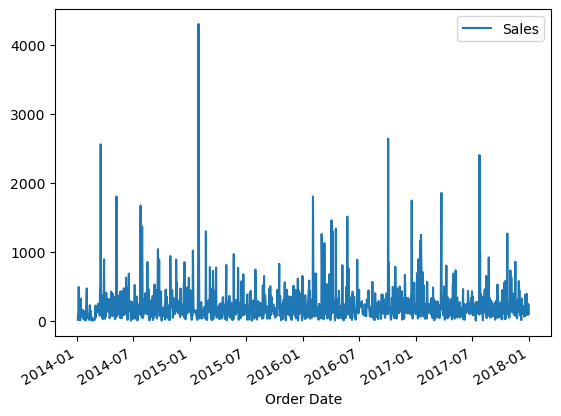

In [21]:
sdf.plot()

In [6]:
train = sdf[sdf.index <= '2017-01-16']

In [7]:
test = sdf[sdf.index > '2017-01-16']
test

,Sales
Order Date,
2017-01-19,223.746111
2017-01-20,127.973000
2017-01-21,181.903071
2017-01-22,702.062000
2017-01-23,64.333429
...,...
2017-12-26,203.648500
2017-12-27,88.818000
2017-12-28,87.228989


<Axes: xlabel='Order Date'>

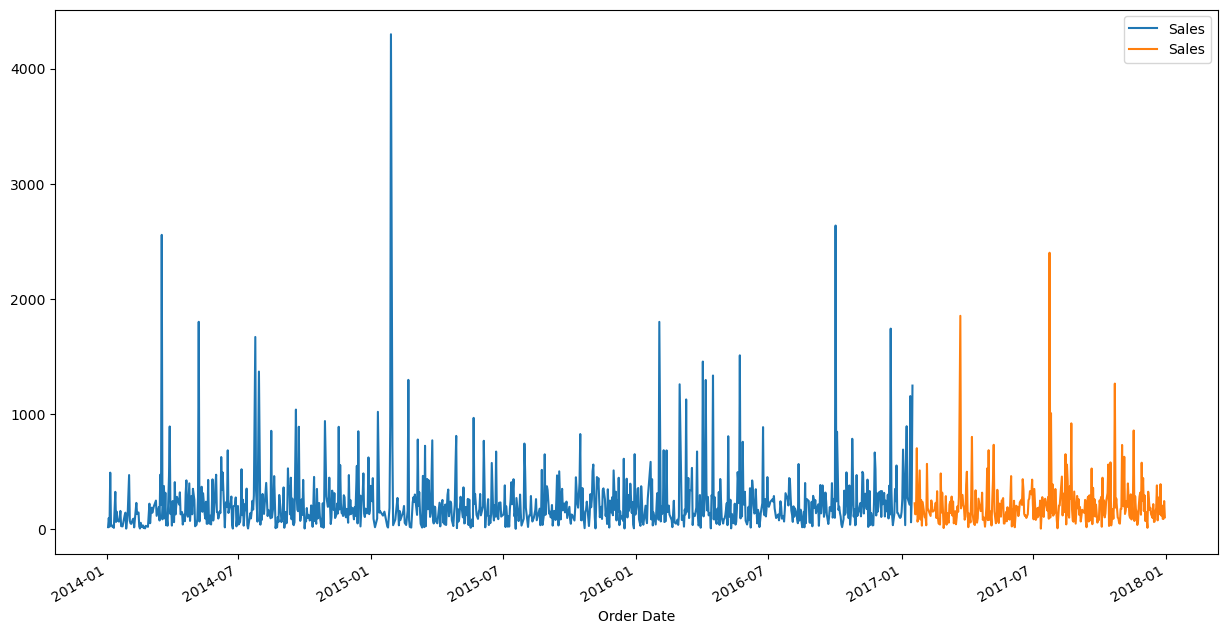

In [100]:
fig , ax = plt.subplots(figsize = (15,8))
train.plot(ax=ax , label = 'actual')
#plt.legend()
test.plot(ax = ax ,label = 'sampletest')
#ax.axvline()
#plt.legend()

In [144]:
#sdf.set_index('Order Date',inplace = True)

In [22]:
#sdf.index

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
results = adfuller(sdf)
print(f"results[1] : {results[1]}") #p<alpha so its stationary

results[1] : 0.0


In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
sdf.resample('MS').mean()

,Sales
Order Date,
2014-01-01,108.041001
2014-02-01,76.652431
2014-03-01,313.306146
2014-04-01,194.726186
2014-05-01,231.376493
2014-06-01,225.452003
2014-07-01,285.654222
2014-08-01,191.912500
2014-09-01,249.588032


In [8]:
y = sdf.resample('MS').mean()

In [15]:
dec = seasonal_decompose(y)
sedec = dec.seasonal

<Axes: xlabel='Order Date'>

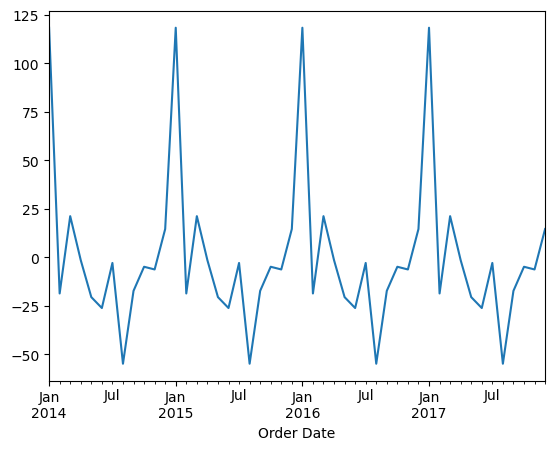

In [16]:
sedec.plot()

In [12]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

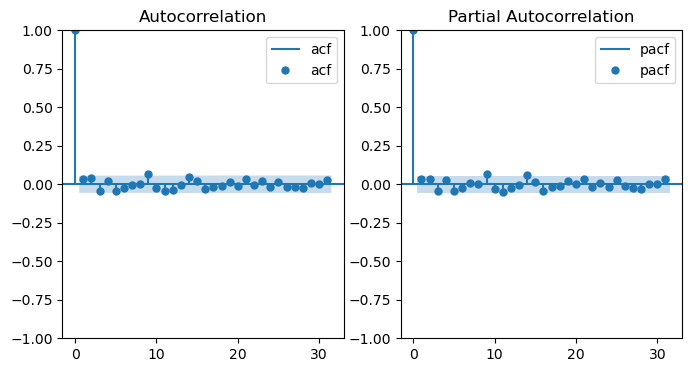

In [30]:
fig , ax = plt.subplots(1,2,figsize = (8,4))
plot_acf(sdf , ax = ax[0] , label = 'acf')
ax[0].legend()
plot_pacf(sdf , ax = ax[1] , label = 'pacf')
plt.legend()  # from p = 1 ,  q = 1

# BY SARIMAX MODEL

In [10]:
import statsmodels.api as sm

In [11]:
model = sm.tsa.statespace.SARIMAX(train, order=(1,0,1) , seasonal_order= (1,0,1,12) , enforce_invertibility= False , enforce_stationarity= False)
results = model.fit()

C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [12]:
pred = results.forecast(steps = len(test))
pred

C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


927     276.769777
928     255.053326
929     278.391952
930     278.095897
931     219.363294
           ...    
1232    256.180457
1233    201.389848
1234    233.017125
1235    233.164935
1236    232.552145
Name: predicted_mean, Length: 310, dtype: float64

In [13]:
pred = pd.DataFrame(pred)
pred

,predicted_mean
927,276.769777
928,255.053326
929,278.391952
930,278.095897
931,219.363294
...,...
1232,256.180457
1233,201.389848
1234,233.017125
1235,233.164935


In [14]:
ts = pd.DataFrame(index = range(927 , 1237))
ts['Order Date'] = test.index

In [15]:
ts['Sales'] = test.values

In [16]:
ts

,Order Date,Sales
927,2017-01-19,223.746111
928,2017-01-20,127.973000
929,2017-01-21,181.903071
930,2017-01-22,702.062000
931,2017-01-23,64.333429
...,...,...
1232,2017-12-26,203.648500
1233,2017-12-27,88.818000
1234,2017-12-28,87.228989
1235,2017-12-29,242.961167


In [17]:
ts['prediction'] = pred

In [18]:
ts.set_index('Order Date',inplace = True)

In [22]:
ts

,Sales,prediction
Order Date,,
2017-01-19,223.746111,276.769777
2017-01-20,127.973000,255.053326
2017-01-21,181.903071,278.391952
2017-01-22,702.062000,278.095897
2017-01-23,64.333429,219.363294
...,...,...
2017-12-26,203.648500,256.180457
2017-12-27,88.818000,201.389848
2017-12-28,87.228989,233.017125


In [19]:
sdf.merge(ts['prediction'] , how = 'left' , left_index= True , right_index= True)

,Sales,prediction
Order Date,,
2014-01-03,16.448000,NaN
2014-01-04,96.020000,NaN
2014-01-05,19.536000,NaN
2014-01-06,489.677778,NaN
2014-01-07,43.579000,NaN
...,...,...
2017-12-26,203.648500,256.180457
2017-12-27,88.818000,201.389848
2017-12-28,87.228989,233.017125


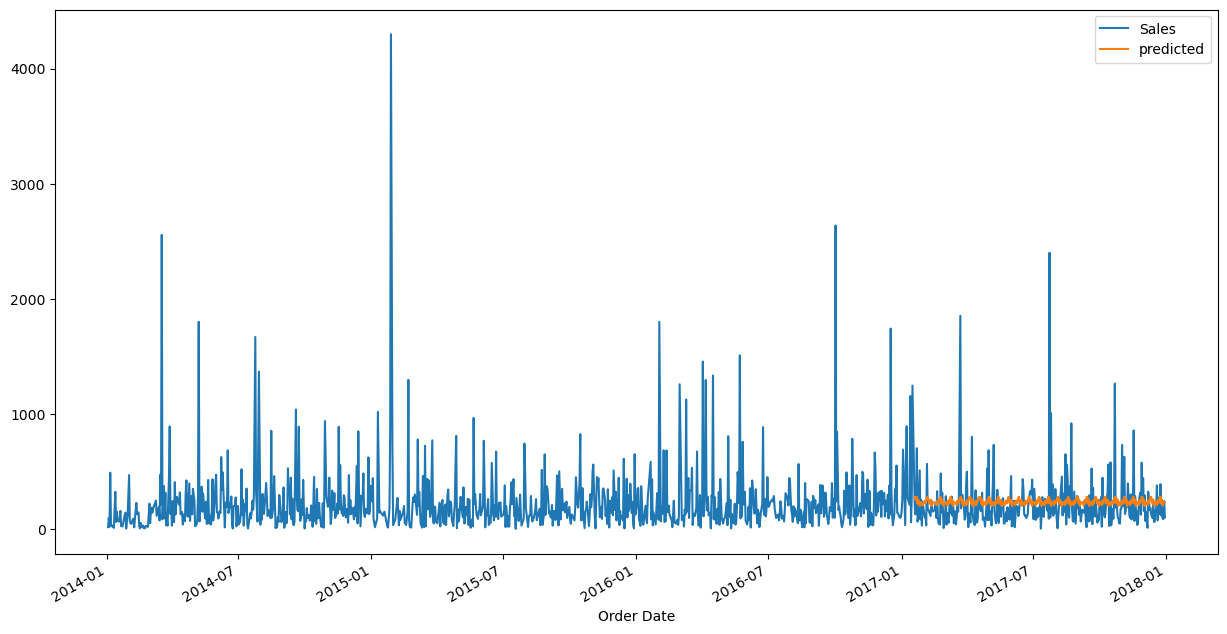

In [25]:
fig , ax = plt.subplots(figsize=(15,8))
sdf.plot(ax=ax , label = 'actual')
ts['prediction'].plot(ax=ax , label = 'predicted')
ax.legend()

In [30]:
train

,Sales
Order Date,
2014-01-03,16.448000
2014-01-04,96.020000
2014-01-05,19.536000
2014-01-06,489.677778
2014-01-07,43.579000
...,...
2017-01-12,212.130000
2017-01-13,1154.832500
2017-01-14,58.668778


In [31]:
test

,Sales
Order Date,
2017-01-19,223.746111
2017-01-20,127.973000
2017-01-21,181.903071
2017-01-22,702.062000
2017-01-23,64.333429
...,...
2017-12-26,203.648500
2017-12-27,88.818000
2017-12-28,87.228989


# by ARIMA MODEL

In [27]:
from statsmodels.tsa.arima.model import ARIMA

In [28]:
mdl = ARIMA(train, order=(1,0,1))
res = mdl.fit()

C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [29]:
pr = res.forecast(len(test))

C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [20]:
sdf

,Sales
Order Date,
2014-01-03,16.448000
2014-01-04,96.020000
2014-01-05,19.536000
2014-01-06,489.677778
2014-01-07,43.579000
...,...
2017-12-26,203.648500
2017-12-27,88.818000
2017-12-28,87.228989


In [21]:
#futuredates = pd.date_range('2018-01-01',periods=365 , freq='D')

In [27]:
model = sm.tsa.statespace.SARIMAX(sdf, order=(1,0,1) , seasonal_order= (1,0,1,12) , enforce_invertibility= False , enforce_stationarity= False)
results = model.fit()

C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [35]:
forecast = results.forecast(steps = 200)
forecast = pd.DataFrame(forecast)
forecast

C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,predicted_mean
1237,164.602220
1238,247.911443
1239,187.709350
1240,207.361677
1241,300.869125
...,...
1432,205.967304
1433,297.903429
1434,235.633289
1435,236.965431


In [46]:
futuredates = pd.date_range('2018-01-01',periods= 200 , freq='D')
futureest = pd.DataFrame(data = futuredates ,columns = ['order date'] ,index=range(1237 , 1437))

In [47]:
futureest

,order date
1237,2018-01-01
1238,2018-01-02
1239,2018-01-03
1240,2018-01-04
1241,2018-01-05
...,...
1432,2018-07-15
1433,2018-07-16
1434,2018-07-17
1435,2018-07-18


In [49]:
futureest['salespred'] = forecast

In [54]:
futureest.set_index('order date' , inplace = True)

In [55]:
futureest

,salespred
order date,
2018-01-01,164.602220
2018-01-02,247.911443
2018-01-03,187.709350
2018-01-04,207.361677
2018-01-05,300.869125
...,...
2018-07-15,205.967304
2018-07-16,297.903429
2018-07-17,235.633289


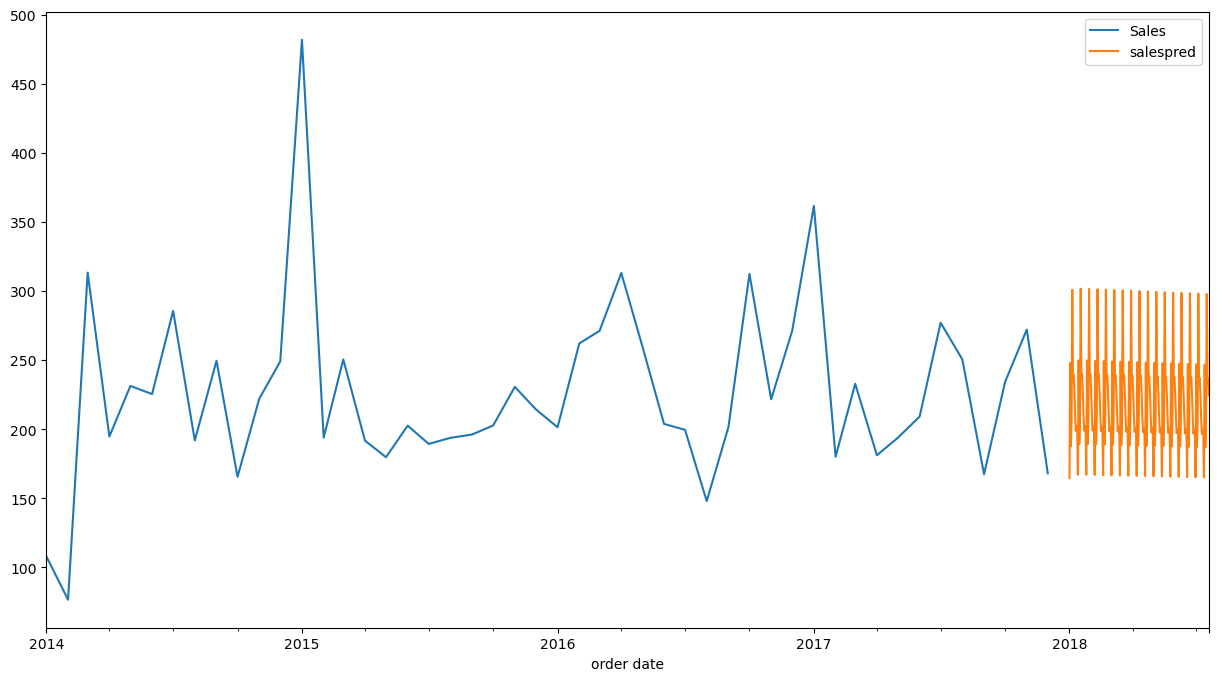

In [56]:
fig , ax = plt.subplots(figsize = (15,8))
y.plot(ax=ax , label = 'sdf')
futureest.plot(ax=ax , label = '200')
ax.legend()